# 1. Изучим общую информацию и подготовим данные

In [1201]:
import pandas as pd

In [1202]:
import numpy as np

In [1203]:
import seaborn as sns

In [1204]:
from matplotlib import pyplot as plt

In [1205]:
visits = pd.read_csv('/datasets/visits_log.csv')

In [1206]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [1207]:
costs = pd.read_csv('/datasets/costs.csv')

In [1208]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [1209]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [1210]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [1211]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [1212]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [1213]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Во всех таблицах поменяем имена столбцов и переведём информацию с датами в соответствующий им тип данных

In [1214]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [1215]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [1216]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [1217]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [1218]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [1219]:
costs['dt'] = pd.to_datetime(costs['dt'])

Проверим визиты и заказы на дубликаты

In [1220]:
visits['uid'].duplicated().sum()

131231

In [1221]:
orders['uid'].duplicated().sum()

13892

Дубликаты говорят о том, что всего за весь период зашли 131231 разных пользователей, а потратило деньги на продукт 13892

Данные подготовлены, теперь можно приступать к анализу

# 2. Подсчитаем метрики и построим отчёты

## Продукт

Посмотрим на то, сколько людей пользуются продуктом в день, неделю и месяц

In [1222]:
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [1223]:
visits['dt'] = visits['start_ts'].astype('datetime64[D]')

In [1224]:
visits['week'] = visits['start_ts'].astype('datetime64[W]')

In [1225]:
visits['month'] = visits['start_ts'].astype('datetime64[M]')

In [1226]:
visits.groupby('dt')['uid'].nunique().head(10)

dt
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
2017-06-06    797
2017-06-07    699
2017-06-08    868
2017-06-09    695
2017-06-10    350
Name: uid, dtype: int64

In [1227]:
visits.groupby('dt')['uid'].nunique().mean().round()

908.0

In [1228]:
visits.groupby('week')['uid'].nunique().head(10)

week
2017-06-01    4082
2017-06-08    3311
2017-06-15    2844
2017-06-22    3079
2017-06-29    3055
2017-07-06    3563
2017-07-13    4790
2017-07-20    2978
2017-07-27    2505
2017-08-03    2343
Name: uid, dtype: int64

In [1229]:
visits.groupby('week')['uid'].nunique().mean().round()

5724.0

In [1230]:
visits.groupby('month')['uid'].nunique()

month
2017-06-01    13259
2017-07-01    14183
2017-08-01    11631
2017-09-01    18975
2017-10-01    29692
2017-11-01    32797
2017-12-01    31557
2018-01-01    28716
2018-02-01    28749
2018-03-01    27473
2018-04-01    21008
2018-05-01    20701
Name: uid, dtype: int64

In [1231]:
visits['month'] = visits['month'].dt.date

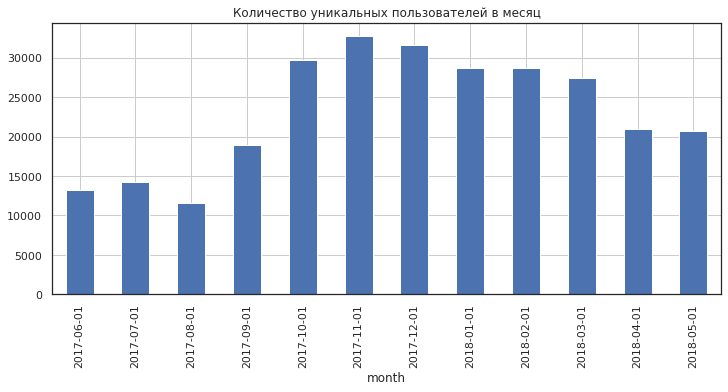

In [1232]:
visits.groupby('month')['uid'].nunique().plot(kind = 'bar', grid = True, figsize = (12,5), 
                                              title = 'Количество уникальных пользователей в месяц')

In [1233]:
visits.groupby('month')['uid'].nunique().mean().round()

23228.0

In [1234]:
visits.query('device == "desktop"').groupby('month')['uid'].nunique()

month
2017-06-01     9761
2017-07-01    10145
2017-08-01     8611
2017-09-01    13509
2017-10-01    21286
2017-11-01    24439
2017-12-01    23294
2018-01-01    20350
2018-02-01    20574
2018-03-01    19574
2018-04-01    14844
2018-05-01    14312
Name: uid, dtype: int64

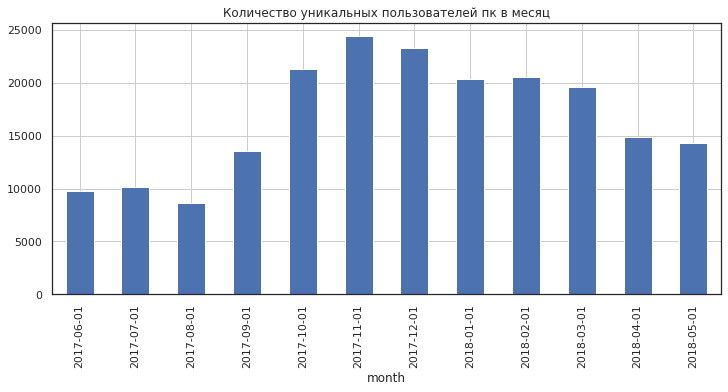

In [1235]:
visits.query('device == "desktop"').groupby('month')['uid'].nunique().plot(kind = 'bar', grid = True, figsize = (12,5), 
                                              title = 'Количество уникальных пользователей пк в месяц')

In [1236]:
visits.query('device == "desktop"').groupby('month')['uid'].nunique().mean().round()

16725.0

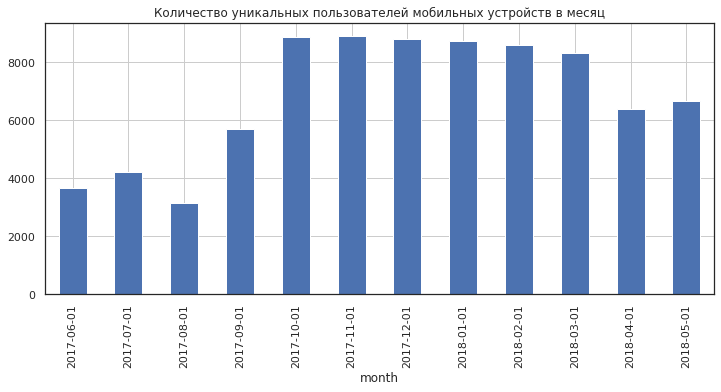

In [1237]:
visits.query('device == "touch"').groupby('month')['uid'].nunique().plot(kind = 'bar', grid = True, figsize = (12,5), 
                                              title = 'Количество уникальных пользователей мобильных устройств в месяц')

In [1238]:
visits.query('device == "touch"').groupby('month')['uid'].nunique().mean().round()

6826.0

В среднем, на данный период, продуктом в день пользуется 908 клиентов. В месяц им пользуются в среднем 5724 клиента, а в год 23228 человек. Также можно отметить, что осенью - зимой самый большой приток клиентов, а количество пользователей пк превышает пользователей мобильных устройств.

Теперь посчитаем, сколько сессий в день приходилось на этот период

In [1239]:
visits.groupby('dt')['uid'].count().mean().round()

987.0

В среднем, количество сессий в день равнялось 987. Это говорит о том, что пользователи иногда перезаходят на сайт в тот же день. 

Посмотрим на то, сколько длится одна сессия. Для этого найдём разницу между датой конца и датой начала сессии

In [1240]:
visits['date_dif'] = visits['end_ts'] - visits['start_ts'] 

In [1241]:
visits.head(10)

,device,end_ts,source_id,start_ts,uid,dt,week,month,date_dif
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,00:00:00
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,00:01:00
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,00:56:00
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01,00:01:00
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01,00:03:00
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01,00:01:00


In [1242]:
visits['date_dif'] = visits['date_dif'].dt.total_seconds()

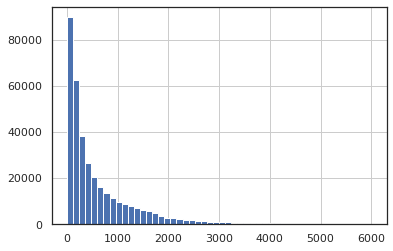

In [1243]:
visits['date_dif'].hist(bins = 50, range = (0, 6000))

In [1244]:
visits['date_dif'].mean()

643.0256872565387

In [1245]:
visits['date_dif'].median()

300.0

In [1246]:
visits['date_dif'].mode()

0    60.0
dtype: float64

Средняя продолжительность сессии отличается от медианной. Это связано с тем, что возможно часть людей забывает закрыть сайт, либо оставляет просмотр на потом и т.д. Также судя по моде, чаще всего пользователи находятся на сайте одну минуту.

Теперь попробуем найти, насколько часто люди возвращаются. Для этого сначала найдём дату первого захода пользователя и объединим с изначальной таблицей

In [1247]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()

In [1248]:
first_activity_date.name = 'first_visit_date'

In [1249]:
visits = visits.join(first_activity_date ,on='uid')

Теперь найдём показатель "lifetime'. Для этого из месяца вычтем первый заход пользователя в этом месяце и разделим на константу

In [1250]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [1251]:
visits['month'] = visits['month'].astype('datetime64[M]')

In [1252]:
visits

,device,end_ts,source_id,start_ts,uid,dt,week,month,date_dif,first_visit_date,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080.0,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680.0,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440.0,2018-03-09 20:05:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0.0,2017-12-27 14:06:00,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,19.0,2017-07-29 19:07:00,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,19.0,2018-01-25 17:38:00,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,19.0,2018-03-03 10:12:00,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,19.0,2017-11-02 10:12:00,2017-11-01


In [1253]:
visits['cohort_lifetime'] = visits['month'] - visits['first_visit_month']

In [1254]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')

In [1255]:
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте и присоединить в изначальную таблицу

In [1256]:
cohorts_visits = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [1257]:
cohorts_visits

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [1258]:
initial_users_count = cohorts_visits[cohorts_visits['cohort_lifetime'] == 0][['first_visit_month','uid']]

In [1259]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [1260]:
initial_users_count

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [1261]:
cohorts_visits = cohorts_visits.merge(initial_users_count,on='first_visit_month')

In [1262]:
cohorts_visits

,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


Теперь посчитаем коэффициент удержания,построим сводную таблицу и тепловой график

In [1263]:
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']

In [1264]:
cohorts_visits['first_visit_month'] = cohorts_visits['first_visit_month'].dt.date

In [1265]:
pivot_visits = cohorts_visits.pivot_table(index = 'first_visit_month', columns = 'cohort_lifetime', values = 'retention', 
                                          aggfunc = 'sum')

In [1266]:
pivot_visits

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


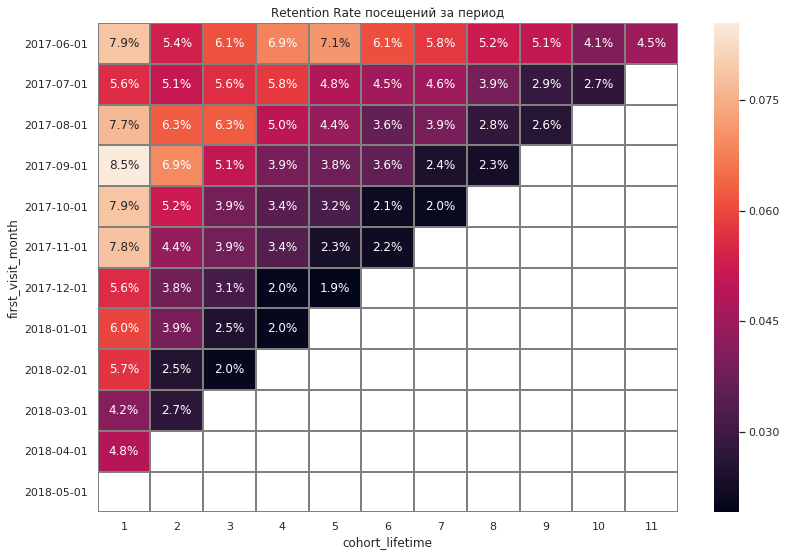

In [1267]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate посещений за период')
sns.heatmap(pivot_visits.drop(columns = [0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray')

Теперь посомтрим на Retention Rate в разрезе по платформам. Начнём с настольных компьютеров

In [1268]:
visits_desktop = visits.query('device == "desktop"')

In [1269]:
cohorts_desktop = visits_desktop.groupby(['first_visit_month','cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [1270]:
cohorts_desktop = cohorts_desktop.merge(initial_users_count,on='first_visit_month')

In [1271]:
cohorts_desktop['retention'] = cohorts_desktop['uid'] / cohorts_desktop['cohort_users']

In [1272]:
pivot_desktop = cohorts_desktop.pivot_table(index = 'first_visit_month', columns = 'cohort_lifetime', values = 'retention', 
                                          aggfunc = 'sum')

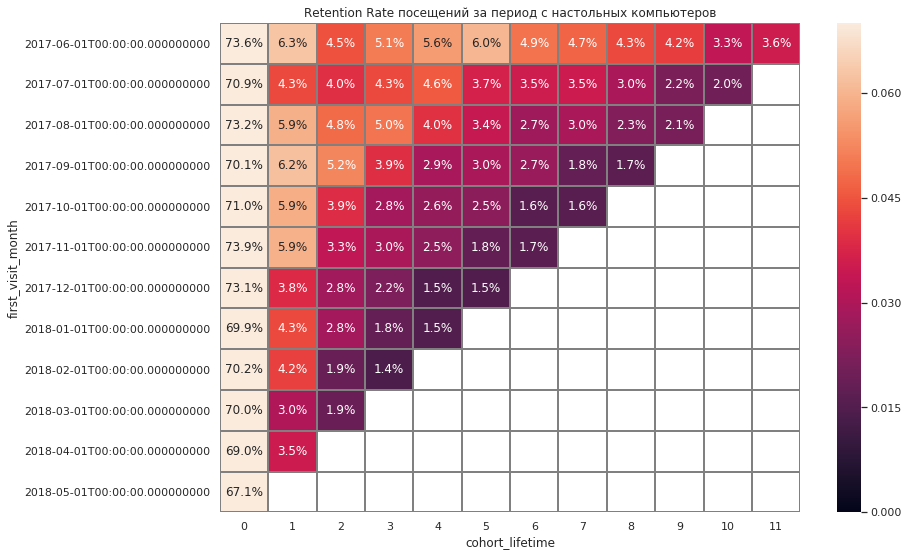

In [1273]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate посещений за период с настольных компьютеров')
sns.heatmap(pivot_desktop, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.07)

Теперь посмотрим на мобильные устройства

In [1274]:
visits_touch = visits.query('device == "touch"')

In [1275]:
cohorts_touch = visits_touch.groupby(['first_visit_month','cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [1276]:
cohorts_touch = cohorts_touch.merge(initial_users_count,on='first_visit_month')

In [1277]:
cohorts_touch['retention'] = cohorts_touch['uid'] / cohorts_touch['cohort_users']

In [1278]:
pivot_touch = cohorts_touch.pivot_table(index = 'first_visit_month', columns = 'cohort_lifetime', values = 'retention', 
                                          aggfunc = 'sum')

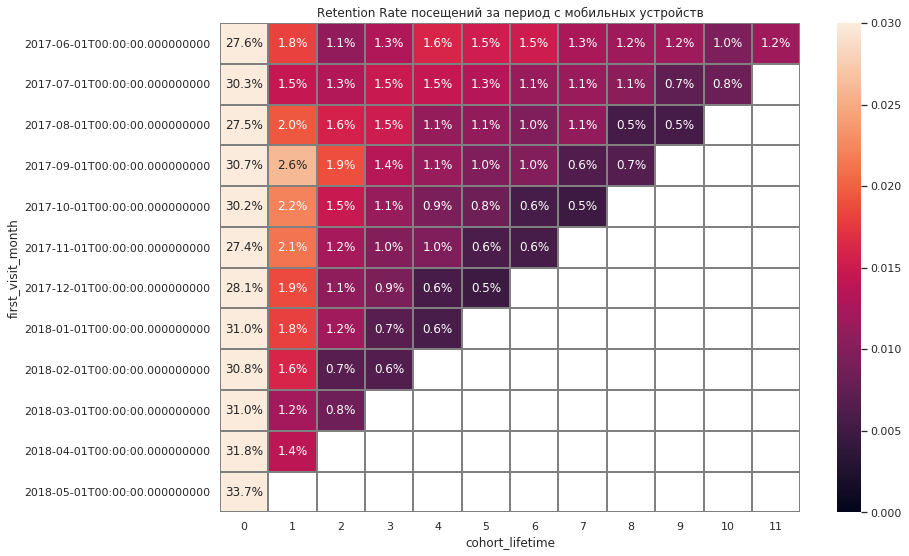

In [1279]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate посещений за период с мобильных устройств')
sns.heatmap(pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.03)

Можно сделать вывод, что на ресурс возвращается очень малый процент людей, либо местами не возвращаются вообще.

### Вывод

Выяснили, что самый большой приток клиентов приходится на осень и зиму. В день люди перезаходят на сайт не так часто,а медианная продолжительность сессии равна пяти минутам. Также судя по когортам, люди на сайт возвращаются довольно редко, но с пк чаще, потому что таких пользователей больше.

## Продажи

Теперь узнаем когда люди начинают совершать заказы. Но сначала, объединим таблицы визитов и заказов

In [1280]:
first_visits = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid') \
                     .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})

In [1281]:
first_orders = orders.sort_values(by = ['uid', 'buy_ts']).groupby(['uid', 'revenue']) \
                     .agg({'buy_ts' : 'first'}).reset_index()

In [1282]:
report = first_visits.merge(first_orders, on = 'uid')

In [1283]:
report

,uid,start_ts,source_id,device,revenue,buy_ts
0,313578113262317,2017-09-18 22:49:00,2,desktop,0.55,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,10,touch,1.22,2017-06-03 10:13:00
2,1575281904278712,2017-06-03 10:13:00,10,touch,1.83,2017-06-03 17:39:00
3,2429014661409475,2017-10-11 17:14:00,3,desktop,73.33,2017-10-11 18:33:00
4,2464366381792757,2018-01-27 20:10:00,5,desktop,2.44,2018-01-28 15:54:00
...,...,...,...,...,...,...
46280,18445407535914413204,2017-09-22 23:48:00,3,desktop,0.24,2017-09-24 23:48:00
46281,18445407535914413204,2017-09-22 23:48:00,3,desktop,0.52,2017-09-22 23:55:00
46282,18445601152732270159,2017-08-07 11:51:00,2,desktop,4.22,2018-03-26 22:54:00
46283,18446156210226471712,2017-11-07 10:01:00,3,desktop,9.78,2018-02-18 19:34:00


Теперь посчитаем разницу от первого визита до первой покупки всех пользователей

In [1284]:
report['ov_dif'] = report['buy_ts'] - report['start_ts'] 

In [1285]:
report['ov_dif'].mean()

Timedelta('32 days 13:53:53.698606')

In [1286]:
report['ov_dif'].median()

Timedelta('0 days 01:14:00')

В среднем с начала даты визита до первой покупки проходит 32 дня и 12 часов. Это связано с большими выбросами в данных, т.к. люди могут купить товар через несколько месяцев после визита. За итог лучше брать медиану, которая устойчива к выбросам и составляет один час и четырнадцать минут.

Найдём то, сколько раз покупают за данный период

In [1287]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [1288]:
one_buy = orders.groupby(['buy_month'])['uid'].agg(['count','nunique']).reset_index()

In [1289]:
one_buy

,buy_month,count,nunique
0,2017-06-01,2354,2023
1,2017-07-01,2363,1984
2,2017-08-01,1807,1472
3,2017-09-01,3387,2750
4,2017-10-01,5679,4675
5,2017-11-01,5659,4547
6,2017-12-01,6218,4942
7,2018-01-01,4721,3898
8,2018-02-01,5281,4258
9,2018-03-01,5326,4181


In [1290]:
one_buy['rate'] = one_buy['count'] / one_buy['nunique']

In [1291]:
one_buy

,buy_month,count,nunique,rate
0,2017-06-01,2354,2023,1.163618
1,2017-07-01,2363,1984,1.191028
2,2017-08-01,1807,1472,1.227582
3,2017-09-01,3387,2750,1.231636
4,2017-10-01,5679,4675,1.214759
5,2017-11-01,5659,4547,1.244557
6,2017-12-01,6218,4942,1.258195
7,2018-01-01,4721,3898,1.211134
8,2018-02-01,5281,4258,1.240254
9,2018-03-01,5326,4181,1.273858


In [1292]:
one_buy['rate'].mean()

1.2058233446244648

В среднем все пользователи совершают по одному заказу в месяц

Теперь найдём средний чек пользователей продукта. Для этого найдём дату первого заказа и сгруппируем пользователей.

In [1293]:
first_order_date = orders.groupby('uid')['buy_month'].min()

In [1294]:
first_order_date.name = 'first_order_date'

In [1295]:
orders = orders.join(first_order_date, on = 'uid')

In [1296]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [1297]:
orders

,buy_ts,revenue,uid,buy_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-01


In [1298]:
orders['revenue'].mean().round()

5.0

Средний чек у продукта равен 5 рублям

Теперь найдём показатель, который покажет итоговую сумму денег которую пользователь приносит со всех покупок (LTV). Для этого сгруппирем пользователей по дате первой покупки и 'возрастным' когортам. 

In [1299]:
costs = costs.rename(columns = {'dt': 'ac_date'})

In [1300]:
users = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid')\
.agg({'start_ts': 'first', 'source_id': 'first', 'device': 'first'}).rename(columns = {'start_ts': 'ac_ts'})

In [1301]:
users['ac_date'] = users['ac_ts'].dt.date

In [1302]:
users['ac_month'] = users['ac_ts'].astype('datetime64[M]')

In [1303]:
users = users.reset_index().set_index(['source_id', 'ac_date']).join(costs.set_index(['source_id', 'ac_date']), how = 'left')

In [1304]:
user_cost = users.groupby(['source_id', 'ac_date']).agg({'device': 'count', 'costs': 'max'})\
.rename(columns = {'device': 'users'})

In [1305]:
user_cost['ac_cost'] = user_cost['costs'] / user_cost['users']

In [1306]:
users = users.join(user_cost[['ac_cost']], how = 'left')

In [1307]:
users = users.reset_index().set_index('uid')[['ac_ts', 'ac_date', 'ac_month', 'source_id', 'device', 'ac_cost']]

In [1308]:
users

,ac_ts,ac_date,ac_month,source_id,device,ac_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.600000
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.600000
...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.177778
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.177778
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.177778


In [1309]:
users_ltv = orders.set_index('uid').join(users, how = 'left')[['ac_month', 'first_order_month',
                                                                   'source_id', 'device',
                                                      'buy_month', 'revenue']].reset_index()

In [1310]:
users_ltv['age_month'] = ((users_ltv['buy_month'] - users_ltv['ac_month']) / np.timedelta64(1, 'M')).round()\
.astype('int')

In [1311]:
users_ltv

,uid,ac_month,first_order_month,source_id,device,buy_month,revenue,age_month
0,9223707061355654945,2017-10-01,2017-10-01,9,touch,2017-10-01,4.64,0
1,9224005701666002943,2017-12-01,2017-12-01,5,desktop,2017-12-01,3.36,0
2,9224005701666002943,2017-12-01,2017-12-01,5,desktop,2018-03-01,3.67,3
3,9225406053864431006,2017-09-01,2017-12-01,4,desktop,2017-12-01,0.43,3
4,9225479525411867039,2018-02-01,2018-02-01,4,touch,2018-02-01,7.33,0
...,...,...,...,...,...,...,...,...
50410,9221059331469344216,2017-12-01,2017-12-01,4,desktop,2017-12-01,0.98,0
50411,9221809908447127809,2017-12-01,2017-12-01,4,desktop,2017-12-01,1.34,0
50412,9222179515197516675,2018-02-01,2018-02-01,1,desktop,2018-02-01,2.20,0
50413,9222413955005962633,2017-11-01,2018-02-01,2,touch,2018-02-01,1.04,3


In [1312]:
cohort_sizes_ltv = users_ltv.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()

In [1313]:
cohorts_ltv = users_ltv.groupby(['first_order_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()

In [1314]:
users_ltv_all = cohort_sizes_ltv.merge(cohorts_ltv, on = 'first_order_month')

In [1315]:
users_ltv_all['age_month'] = ((users_ltv_all['buy_month'] - users_ltv_all['first_order_month'])/ np.timedelta64(1, 'M'))\
.round().astype('int')

In [1316]:
users_ltv_all['ltv'] = users_ltv_all['revenue'] / users_ltv_all['uid']

In [1317]:
users_ltv_all

,first_order_month,uid,buy_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [1318]:
users_pivot_ltv_all = users_ltv_all\
.pivot_table(index = 'first_order_month', columns = 'age_month', values = 'ltv', aggfunc = 'mean').cumsum(axis = 1)

In [1319]:
users_ltv_all_final = users_pivot_ltv_all.append(pd.DataFrame(users_pivot_ltv_all.mean().to_frame(name = 'Total')).T)\
.round(2)

In [1320]:
users_ltv_all_final.fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01 00:00:00,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01 00:00:00,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01 00:00:00,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01 00:00:00,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01 00:00:00,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01 00:00:00,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01 00:00:00,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01 00:00:00,4.16,4.44,4.51,4.59,,,,,,,,
2018-03-01 00:00:00,4.84,5.14,5.46,,,,,,,,,


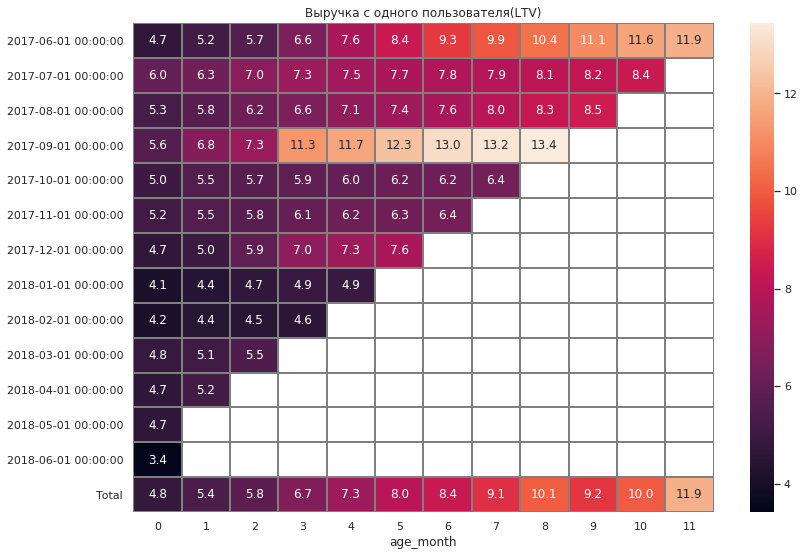

In [1321]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Выручка с одного пользователя(LTV)')
sns.heatmap(users_ltv_all_final, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

В среднем общий ltv когорт растёт, но в начале 2018 года темп начинает падать, по сравнению с предыдущими месяцами

Теперь взглянем на этот показатель в разрезе устройств.

In [1322]:
device = ['device']

In [1323]:
cohorts_device = users.groupby(device).agg({'source_id': 'count', 'ac_cost': 'sum'})\
.rename(columns = {'source_id': 'cohort_size'})

In [1324]:
users_ltv_device = users_ltv.groupby(device + ['ac_month']).agg({'revenue': 'sum'})

In [1325]:
users_ltv_device = users_ltv_device.pivot_table(index = device, columns = 'ac_month', values = 'revenue', aggfunc = 'sum')

In [1326]:
users_ltv_device = users_ltv_device.cumsum(axis = 1)

In [1327]:
users_ltv_device = cohorts_device[['cohort_size']].join(users_ltv_device)

In [1328]:
users_ltv_device = users_ltv_device.div(users_ltv_device['cohort_size'], axis = 0).drop(columns = ['cohort_size'])

In [1329]:
users_ltv_device

,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
device,,,,,,,,,,,,
desktop,0.220179,0.307763,0.372204,0.554071,0.696398,0.821738,0.991857,1.065823,1.142167,1.209786,1.261788,1.314281
touch,0.068608,0.123957,0.169968,0.235858,0.309658,0.373077,0.429532,0.468915,0.510259,0.553263,0.575838,0.604498


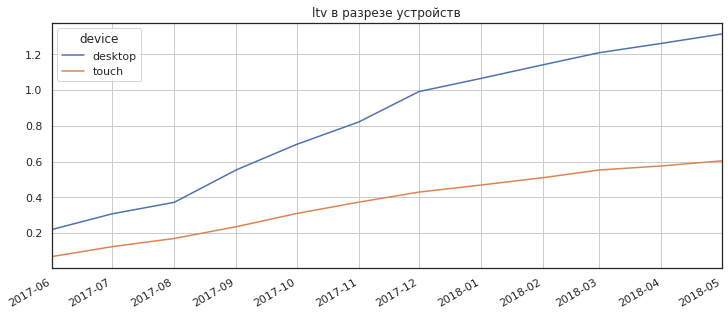

In [1330]:
users_ltv_device.T.plot(grid = True, figsize = (12,5), title = 'ltv в разрезе устройств')

Из графика видно, что темп роста прибыли с одного клиента на мобильных устройствах гораздо хуже чем на пк.

Теперь найдём ltv в разрезе источников по месяцам

In [1331]:
source = ['source_id']

In [1332]:
cohorts_source = users.groupby(source).agg({'source_id': 'count', 'ac_cost': 'sum'})\
.rename(columns = {'source_id': 'cohort_size'})

In [1333]:
users_ltv_source = users_ltv.groupby(source + ['age_month']).agg({'revenue': 'sum'})

In [1334]:
users_ltv_source = users_ltv_source.pivot_table(index = source, columns = 'age_month', values = 'revenue', aggfunc = 'sum')

In [1335]:
users_ltv_source = users_ltv_source.cumsum(axis = 1)

In [1336]:
users_ltv_source = cohorts_source[['cohort_size']].join(users_ltv_source)

In [1337]:
users_ltv_source = users_ltv_source.div(users_ltv_source['cohort_size'], axis = 0).drop(columns = ['cohort_size'])

In [1338]:
users_ltv_source

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


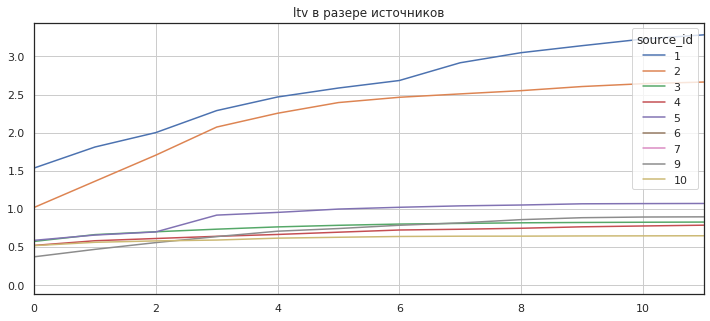

In [1339]:
users_ltv_source.T.plot(grid = True, figsize = (12,5), title = 'ltv в разере источников')

## Вывод

Выяснили, что пользователи в основном совершают по одному заказу. Средний чек при этом равен пяти рублям. Стоит отметить, что первая когорта чаще всего приносит меньше денег, чем последующие, а один пользователь с пк приносит в среднем больше, чем с мобильных устройств. У когорт в целом ltv с каждым месяцем растёт, правда с 2018 года темп немного падает. Также один покупатель из второго источника приносит больше всего денег, не смотря на небольшое колиечство пользователей. Самыми прибыльными оказались 1 и 2 источники.

## Маркетинг

Посмотрим на то, сколько всего потратили денег на маркетинг. А также на затраты по каждому источнику и по времени

In [1340]:
users

,ac_ts,ac_date,ac_month,source_id,device,ac_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.600000
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.600000
...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.177778
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.177778
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.177778


In [1341]:
users['ac_cost'].sum()

329066.4799999999

In [1342]:
users_cac_all = users.reset_index().groupby('ac_month').agg({'ac_cost':'sum'}).reset_index()

In [1343]:
users_cac_all = users_cac_all.rename(columns = {'ac_month':'first_order_month'})

In [1344]:
users_cac_all

,first_order_month,ac_cost
0,2017-06-01,18015.00
1,2017-07-01,18230.81
2,2017-08-01,14789.17
3,2017-09-01,24360.36
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38306.03
7,2018-01-01,33518.52
8,2018-02-01,32707.71
9,2018-03-01,30414.57


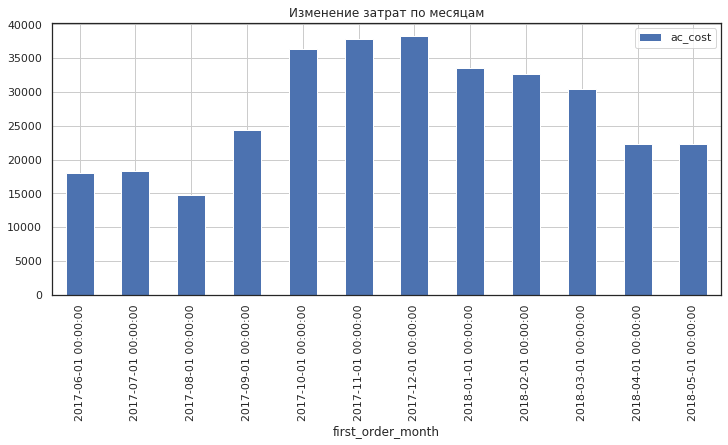

In [1345]:
users_cac_all.plot(kind = 'bar', x = 'first_order_month', y = 'ac_cost', grid = True, figsize = (12,5), 
                   title = 'Изменение затрат по месяцам')

Всего было потрачено 329132 рубля, при этом третий источник был самый дорогой. Самые большие затраты на маркетинг приходятся с октября по март.

Посмотрим на показатель CAC

In [1346]:
users_cac_all = users_ltv_all.merge(users_cac_all, on = 'first_order_month', how = 'left')

In [1347]:
users_cac_all['cac'] = users_cac_all['ac_cost'] / users_cac_all['uid']

In [1348]:
users_cac_all

,first_order_month,uid,buy_month,revenue,age_month,ltv,ac_cost,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00,8.905091
...,...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30414.57,8.608709
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22269.28,9.784394
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22269.28,9.784394
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562,22224.27,7.437841


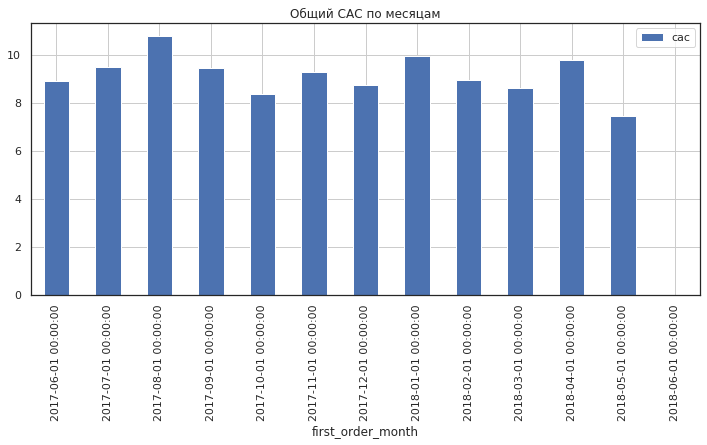

In [1349]:
users_cac_all.groupby('first_order_month').agg({'cac': 'max'}).plot(kind = 'bar', grid = True, figsize = (12,5),
                                                                    title = 'Общий CAC по месяцам')

In [1350]:
cohorts_device['cac'] = cohorts_device['ac_cost'] / cohorts_device['cohort_size']

In [1351]:
cohorts_device

,cohort_size,ac_cost,cac
device,,,
desktop,160795,235065.750929,1.461897
touch,67374,94000.729071,1.395208


Теперь посмотрим на cac в разере источников

In [1352]:
cohorts_source['cac'] = cohorts_source['ac_cost'] / cohorts_source['cohort_size']

In [1353]:
cohorts_source

,cohort_size,ac_cost,cac
source_id,,,
1,9469,20833.27,2.200155
2,17616,42806.04,2.429952
3,66116,141321.63,2.137480
4,72346,61073.60,0.844188
5,49237,51756.40,1.051169
6,2,0.00,0.000000
7,32,0.00,0.000000
9,6448,5454.42,0.845909
10,6903,5821.12,0.843274


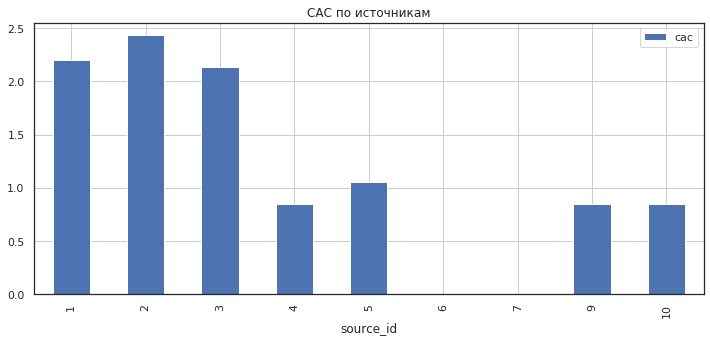

In [1354]:
cohorts_source.reset_index().plot(kind = 'bar', x = 'source_id', y = 'cac', grid = True, figsize = (12,5),
                                  title = 'CAC по источникам')

Больше всего затрат на привлечение одного покупателя на всех устройствах пришлось на второй, первый и третий источник.

Теперь посчитаем то, насколько окупились расходы. Для этого рассчитаем показатель ROMI. 

In [1355]:
users_romi_all['romi'] = users_cac_all['ltv'] / users_cac_all['cac']

In [1356]:
users_romi_all

,first_order_month,uid,buy_month,revenue,age_month,ltv,ac_cost,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00,0.114825
...,...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30414.57,0.036656
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22269.28,0.476023
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22269.28,0.054331
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562,22224.27,0.626601


In [1357]:
users_romi_all_final = users_romi_all\
.pivot_table(index = 'first_order_month', columns = 'age_month', values = 'romi', aggfunc = 'mean')\
.cumsum(axis = 1)

In [1358]:
users_romi_all_final.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.74,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.24,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.5,0.5,0.51,,,,,,,,


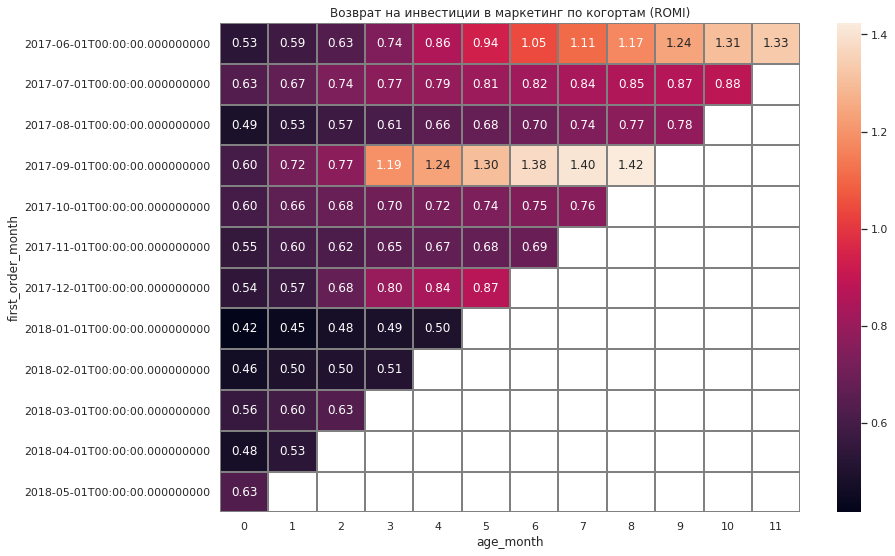

In [1359]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Возврат на инвестиции в маркетинг по когортам (ROMI)')
sns.heatmap(users_romi_all_final, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

In [1360]:
users_romi_all_final.mean()

age_month
0     0.540931
1     0.582123
2     0.631183
3     0.719887
4     0.783087
5     0.860043
6     0.896984
7     0.970153
8     1.054128
9     0.964667
10    1.094895
11    1.333982
dtype: float64

В среднем, когорты окупаются к 7-8 месяцу.

Теперь посмотрим на romi в разрезе устройств

In [1361]:
users_romi_device = users_ltv_device.merge(cohorts_device[['cac']], on = 'device', how = 'left')

In [1362]:
users_romi_device = users_romi_device.div(users_romi_device['cac'], axis = 0).drop(columns = ['cac'])

In [1363]:
users_romi_device = users_romi_device.cumsum(axis = 1)

In [1364]:
users_romi_device

,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
device,,,,,,,,,,,,
desktop,0.150612,0.361134,0.615738,0.994746,1.471113,2.033216,2.711688,3.440757,4.222048,5.049593,5.912710,6.811734
touch,0.049174,0.138019,0.259842,0.428890,0.650834,0.918233,1.226096,1.562186,1.927908,2.324453,2.737179,3.170446


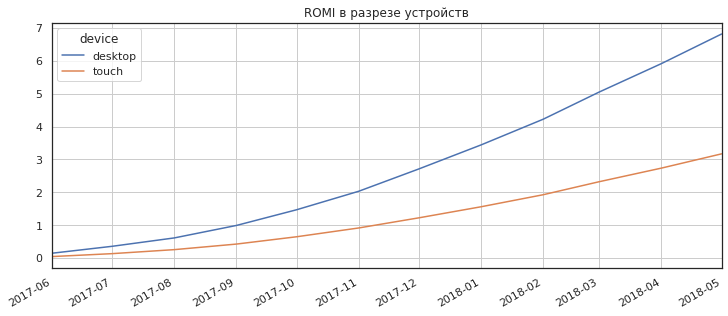

In [1365]:
users_romi_device.T.plot(grid = True, figsize = (12,5), title = 'ROMI в разрезе устройств')

Пк окупились уже в сентябре, а мобильные устройства только в декабре

Теперь посмотрим на окупаемость источников

In [1366]:
users_romi_source = users_ltv_source.merge(cohorts_source[['cac']], on = 'source_id', how = 'left')

In [1367]:
users_romi_source

,0,1,2,3,4,5,6,7,8,9,10,11,cac
source_id,,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404,2.200155
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693,2.429952
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479,2.137480
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690,0.844188
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790,1.051169
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207,0.845909
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695,0.843274


In [1368]:
users_romi_source = users_romi_source.div(users_romi_source['cac'], axis = 0).drop(columns = ['cac'])

In [1369]:
users_romi_source = users_romi_source.cumsum(axis = 1)

In [1370]:
users_romi_source

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.697297,1.520065,2.429019,3.469247,4.590691,5.765618,6.985396,8.311164,9.697064,11.124697,12.591864,14.084215
2,0.418291,0.978129,1.679211,2.532074,3.459543,4.444814,5.458600,6.490648,7.540258,8.612132,9.699319,10.795511
3,0.266843,0.575536,0.901741,1.243777,1.599884,1.965748,2.339200,2.716755,3.097943,3.481219,3.865883,4.251607
4,0.613237,1.299449,2.020463,2.775549,3.559511,4.378664,5.231884,6.096798,6.977270,7.880110,8.795963,9.724299
5,0.556115,1.178357,1.839533,2.710787,3.615987,4.562810,5.531897,6.518862,7.516323,8.528916,9.544118,10.560881
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.435346,0.986382,1.642294,2.391453,3.224359,4.098725,5.023889,5.985626,6.997967,8.040360,9.093429,10.149343
10,0.610616,1.273258,1.957768,2.655456,3.382717,4.123792,4.877165,5.634998,6.393567,7.155175,7.918126,8.682640


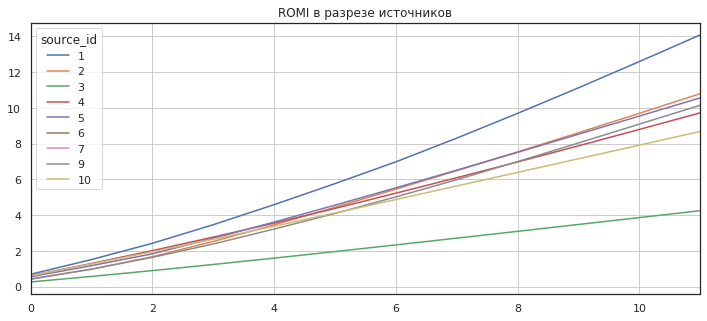

In [1371]:
users_romi_source.T.plot(grid = True, figsize = (12,5), title = 'ROMI в разрезе источников')

В среднем, источники окупаются за 1-2 месяца

## Вывод

Выяснили, что лучшим источником трафика служит четвёртый источник и пятый т.к. в них стоимость одного пользователя дешевле и привлекает больше клиентов. На маркетинг всего было потрачено денег больше, чем получено прибыли за данный период. Расходы тем временем в среднем окупаются примерно к 7-8 месяцу, при этом пк окупились в сентябре, а мобильные устройства в декабре.

# 3. Общий вывод

По проведённому анализу можно сделать вывод о том, что больше всего можно заработать на четвёртом и пятом источнике среди компьютеров, так как с них больше всего визитов и соответственно возвращается больше пользователей, судя по показателю Retention rate. Судя по показателю CAC(стоимость привлечения клиента) больше всего затрат пришлось на 3 источник, который окупается, хуже всего, судя по показателю ROMI. Лучшими по окупаемости оказался при этом первый источник. Также выяснили, что пользователи в основном покупают осенью, зимой и весной, при этом затраты на маркетинг также были распределены в большем количестве на эти периоды. В целом можно порекомендовать снизить рекламный бюджет летом и вложить больше денег в рекламу через 1,2,4,5 и 1 источник. При этом снизить рекламный бюджет на 3 источник.